# Image classification with Neural Networks

## Machine Learning Project


\
**Group:** Andrea Ierardi, Emanuele Morales, Gregorio Luigi Saporito


## 1. The dataset

## 1.1 Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import pandas as pd 


from sklearn.datasets import load_files
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

os.chdir('C:\\Users\\gregs\\OneDrive\\Documenti\\GitHub\\Machine-Learning-Project')
os.getcwd()

'C:\\Users\\gregs\\OneDrive\\Documenti\\GitHub\\Machine-Learning-Project'

## 1.2 Data Loading

In [3]:
DATADIR = "dataset/fruits-360/Training"
DATADIR_test = "dataset/fruits-360/Test"

TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits = {}
def load_dataset(dire):
    fruits = {}
    images_as_array = []
    labels =[]
    for category in tqdm(os.listdir(dire)):
        for typ in TYPES:
            if(category.split()[0] == typ):
               # print(category, typ)
                fruits[category]= typ
                path = os.path.join(dire,category)
                class_num =TYPES.index(fruits[category])

                class_name = fruits[category]
                for img in tqdm(os.listdir(path)):
                   # print("OK: ",os.path.join(path,img) )
                    file = os.path.join(path,img)
                    #print(file, " -- ", dataset)
                    images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
                    labels.append(class_num)
    images_as_array =  np.array(images_as_array)
    labels = np.array(labels)
    return images_as_array, labels




### Split in test and training sets

In [4]:
train = load_dataset(DATADIR)
test = load_dataset(DATADIR_test)


 22%|█████████████████▊                                                             | 108/480 [00:00<00:02, 147.23it/s]


 42%|█████████████████████████████████                                              | 201/481 [00:01<00:02, 106.43it/s]


 75%|███████████████████████████████████████████████████████████▍                   | 343/456 [00:02<00:00, 163.57it/s]


  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


 49%|██████████████████████████████████████▊                                        | 242/492 [00:01<00:01, 152.32it/s]


 37%|█████████████████████████████▏                                                 | 181/490 [00:00<00:01, 180.80it/s]


 91%|███████████████████████████████████████████████████████████████████████▌       | 444/490 [00:02<00:00, 188.87it/s]


 90%|██████████████████████████████████████████████████████████████████████▊        | 661/738 [00:03<00:00, 175.09it/s]


 83%|█████████████████████████████████████████████████████████████████▊             | 410/492 [00:02<00:00, 189.68it/s]


 17%|█████████████▌                                                                 | 169/984 [00:00<00:04, 194.11it/s]


 85%|██████████████████████████████████████████████████████████████████▉            | 417/492 [00:02<00:00, 156.42it/s]


 33%|██████████████████████████▏                                                    | 163/492 [00:00<00:01, 198.31it/s]


 87%|████████████████████████████████████████████████████████████████████▉          | 429/492 [00:02<00:00, 160.68it/s]


 89%|██████████████████████████████████████████████████████████████████████▎        | 438/492 [00:02<00:00, 184.75it/s]


 26%|████████████████████▌                                                          | 183/702 [00:01<00:03, 165.28it/s]


 69%|████████████████████████████████████████████████████████                         | 83/120 [01:49<01:35,  2.59s/it]


 53%|██████████████████████████████████████████▏                                    | 237/444 [00:01<00:01, 125.84it/s]


 80%|██████████████████████████████████████████████████████████████▊                | 530/666 [00:02<00:00, 186.57it/s]


 16%|████████████▋                                                                  | 145/900 [00:00<00:03, 190.75it/s]


 83%|██████████████████████████████████████████████████████████████████▋             | 100/120 [02:17<00:48,  2.43s/it]


 64%|███████████████████████████████████████████████████▍                            | 289/450 [00:02<00:01, 81.86it/s]


 46%|████████████████████████████████████                                           | 307/672 [00:02<00:02, 135.31it/s]


 28%|██████████████████████▍                                                        | 136/479 [00:00<00:01, 193.33it/s]


 91%|███████████████████████████████████████████████████████████████████████▋       | 333/367 [00:01<00:00, 157.25it/s]


 38%|██████████████████████████████▏                                                 | 62/164 [00:00<00:00, 139.84it/s]


 78%|█████████████████████████████████████████████████████████████▍                 | 112/144 [00:00<00:00, 178.82it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<00:00, 179.27it/s]


 12%|█████████▎                                                                      | 19/164 [00:00<00:00, 184.47it/s]


 47%|█████████████████████████████████████▌                                          | 77/164 [00:00<00:00, 151.14it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 246/246 [00:01<00:00, 181.82it/s]

100%|███████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<00:00, 186.57it/s]


  0%|                                                                                          | 0/222 [00:00<?, ?it/s]


 27%|█████████████████████▎                                                          | 40/150 [00:00<00:00, 200.98it/s]


 17%|█████████████▉                                                                  | 43/246 [00:00<00:00, 210.94it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:57<00:00,  2.10it/s]


In [5]:
x_train, y_train= train

In [6]:
x_test, y_test = test

### Train and test shape

In [7]:
print('Train shape:')
print('X: ',x_train.shape)
print('y: ',y_train.shape)

print('Test shape')
print('X: ',x_test.shape)
print('y: ',y_test.shape)


Train shape:
X:  (29340, 32, 32, 3)
y:  (29340,)
Test shape
X:  (9817, 32, 32, 3)
y:  (9817,)


## 1.2 Pre-processing 

### Pre-process the labels and the images

In [8]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)


In [9]:
print(y_train[0:10])
print("Number of classes: ",no_of_classes)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Number of classes:  10


### Visualisation of the first 10 images

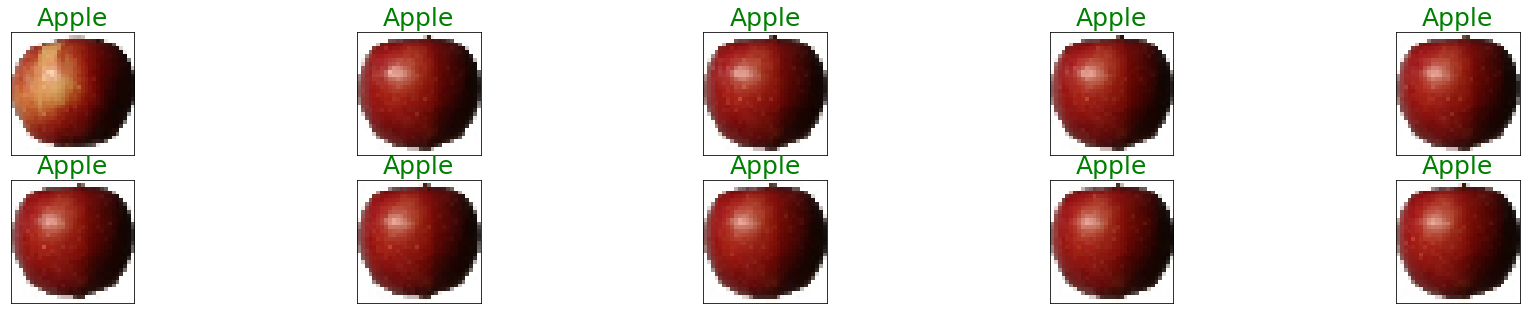

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

### Suffle of the data

In [11]:
from sklearn.utils import shuffle
import numpy as np
x_train,y_train = shuffle(x_train, y_train)
x_test,y_test = shuffle(x_test, y_test)

### Visualisation of the first 10 images shuffled

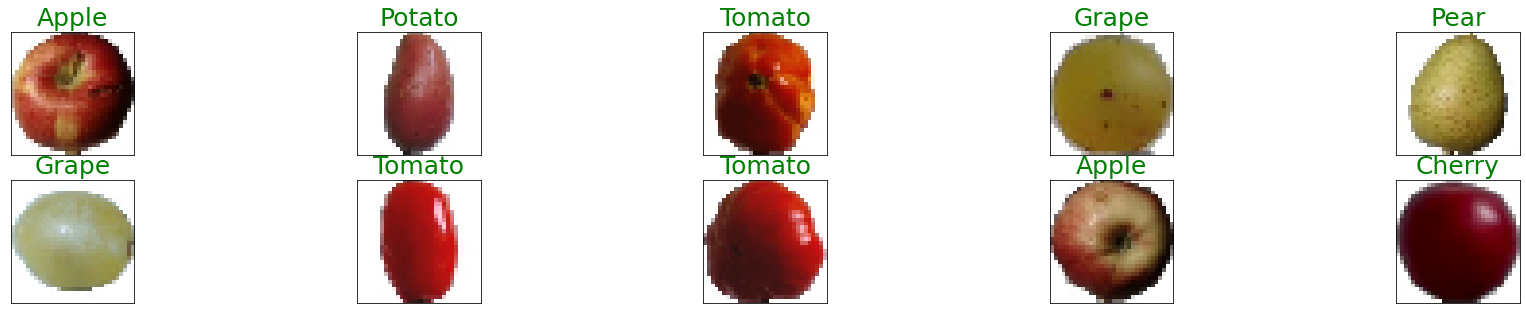

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

### Split in validation and test set

In [13]:
# Using 80-20 rule
split = len(x_test)*80//100

print('Test len before split: ',len(x_test))
print('Validation split len:', split)

Test len before split:  9817
Validation split len: 7853


In [14]:

# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[split:],x_test[:split]
y_test,y_vaild = y_test[split:],y_test[:split]
print('Train X : ',x_train.shape)
print('Train y :',y_train.shape)

print('1st training image shape ',x_train[0].shape)

print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Train X :  (29340, 32, 32, 3)
Train y : (29340, 10)
1st training image shape  (32, 32, 3)
Vaildation X :  (7853, 32, 32, 3)
Vaildation y : (7853, 10)
Test X :  (1964, 32, 32, 3)
Test y :  (1964, 10)


## PCA and feed-forward NN

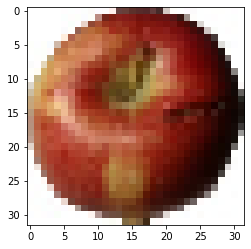

In [15]:
#attempt to plot image
plt.imshow(x_train[0])

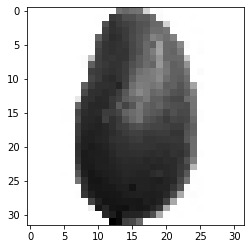

In [16]:
x_train[1].shape
type(x_train[1])
rgb_weights = [0.2989, 0.5870, 0.1140]
image_test = x_train[1]
image_grey = np.dot(image_test[...,:3], rgb_weights)
plt.imshow(image_grey, cmap=plt.get_cmap("gray"))

In [21]:
# transform my np.ndarray from rgb to grey
x_train_grey = np.ndarray(shape=(x_train.shape[0], 32, 32))
for i in range(x_train.shape[0]):
    image_convert = x_train[i]
    x_train_grey[i] = np.dot(image_convert[...,:3], rgb_weights)

x_valid_grey = np.ndarray(shape=(x_valid.shape[0], 32, 32))
for i in range(x_valid.shape[0]):
    image_convert = x_valid[i]
    x_valid_grey[i] = np.dot(image_convert[...,:3], rgb_weights)
    
x_test_grey = np.ndarray(shape=(x_test.shape[0], 32, 32))
for i in range(x_test.shape[0]):
    image_convert = x_test[i]
    x_test_grey[i] = np.dot(image_convert[...,:3], rgb_weights)

In [22]:
# flatten my 32x32 images by concatenating them into a vector, each column of the matrix will be an image
x_train_flat = np.ndarray(shape=(1024, x_train_grey.shape[0]))
for i in range(x_train_grey.shape[0]):
    x_train_flat[:,i] = np.concatenate(x_train_grey[i])
    
x_valid_flat = np.ndarray(shape=(1024, x_valid_grey.shape[0]))
for i in range(x_valid_grey.shape[0]):
    x_valid_flat[:,i] = np.concatenate(x_valid_grey[i])
    
x_test_flat = np.ndarray(shape=(1024, x_test_grey.shape[0]))
for i in range(x_test_grey.shape[0]):
    x_test_flat[:,i] = np.concatenate(x_test_grey[i])

In [23]:
# standardise each column
from scipy import stats
x_train_flat = stats.zscore(x_train_flat)
x_valid_flat = stats.zscore(x_valid_flat)
x_test_flat = stats.zscore(x_test_flat)

In [24]:
x_train_flat.shape

(1024, 29340)

In [25]:
a = np.cov(x_train_flat)
b = np.linalg.eig(a)
b[0].shape

(1024,)

In [26]:
b

(array([7.15237860e+01, 5.70970689e+01, 4.18607912e+01, ...,
        7.03509982e-03, 8.31239889e-03, 7.67012227e-03]),
 array([[-0.01684402,  0.01734019,  0.03957773, ...,  0.00082355,
         -0.00022501,  0.00204742],
        [-0.01686373,  0.01741079,  0.03971343, ...,  0.00151048,
          0.00276645, -0.00657773],
        [-0.01685467,  0.01738816,  0.03976034, ..., -0.00163769,
          0.01939244, -0.0025233 ],
        ...,
        [-0.01701465,  0.01730407,  0.03959935, ...,  0.0006273 ,
          0.00102269,  0.00277181],
        [-0.01701393,  0.01730305,  0.03959787, ...,  0.00063352,
          0.00096777,  0.00269121],
        [-0.01701513,  0.01730415,  0.03959887, ...,  0.00062881,
          0.00099953,  0.00275065]]))

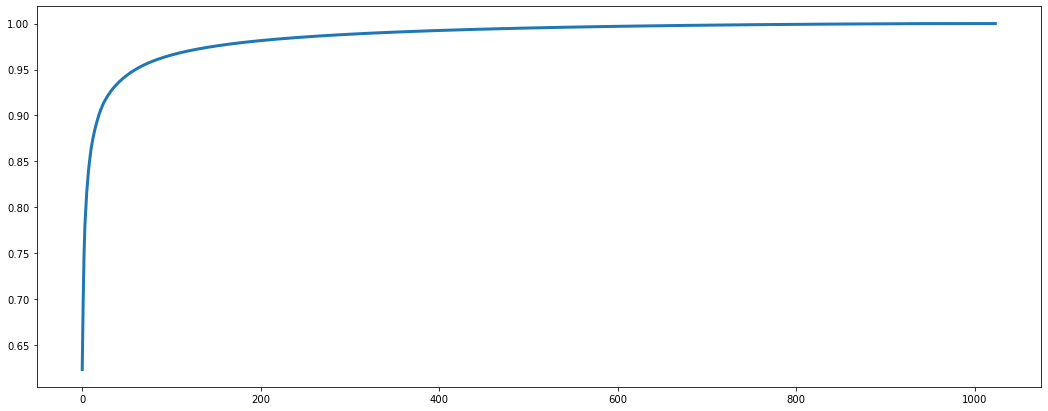

In [27]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train_flat)
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

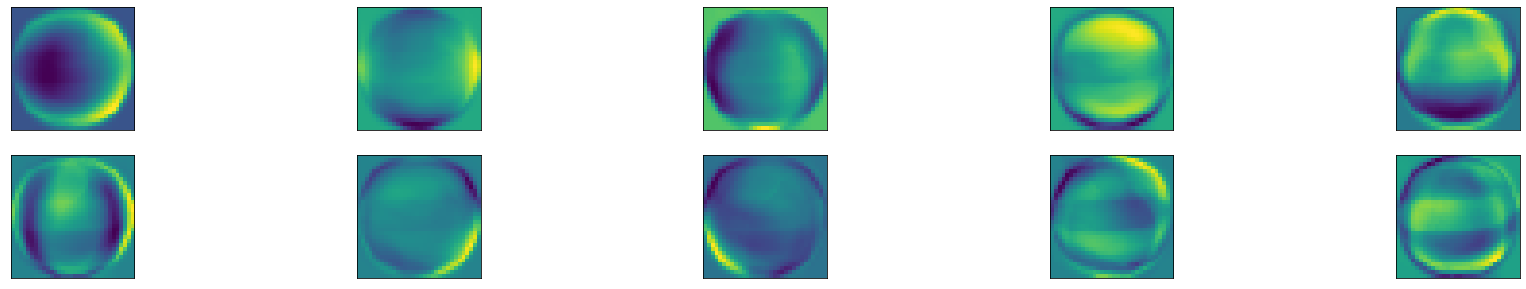

In [28]:
# try to plot some of the eigenvectors, the so called "eigenfruits"
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(b[1][:,i].reshape(32,32)))

## Reduce dimensionality of images with PCA

In [78]:
x_all = np.concatenate( (
x_train_flat,
x_valid_flat,
x_test_flat),
    axis = 1
)

In [79]:
x_all.shape

(1024, 39157)

In [74]:
x_train_flat.shape
type(x_train_flat)

numpy.ndarray

In [181]:
from sklearn.decomposition import PCA

def PCA_iter(max_comp):
    lis =[]
    for i in range(10, max_comp+1, 10):
                print("\n\n===== Component: ",i,"=====\n")
                pca = PCA(n_components=i)
                pca.fit(x_all)
                
                X_pca = pca.transform(x_all)
                
                
                X_new = pca.inverse_transform(X_pca)
                print("original shape:   ", x_all.shape)
                print("transformed shape:", X_pca.shape)
                
                ind1 = x_train_flat.shape[1]
                ind2 = ind1 + x_valid_flat.shape[1]
                ind3 = ind2 + x_test_flat.shape[1]

                tupla = (x_train_PCA, x_valid_PCA, x_test_PCA) = X_new[:,0:ind1], X_new[:,ind1:ind2],X_new[:,ind2:ind3]
                
                lis.append(tupla)
    return lis
        

In [187]:
lis_PCA =  PCA_iter(50)



===== Component:  10 =====

original shape:    (1024, 39157)
transformed shape: (1024, 10)


===== Component:  20 =====

original shape:    (1024, 39157)
transformed shape: (1024, 20)


===== Component:  30 =====

original shape:    (1024, 39157)
transformed shape: (1024, 30)


===== Component:  40 =====

original shape:    (1024, 39157)
transformed shape: (1024, 40)


===== Component:  50 =====

original shape:    (1024, 39157)
transformed shape: (1024, 50)


2

In [165]:
PCA_iter(200)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(x_all)

PCA(n_components=50)

In [81]:
print(pca.components_)
pca.components_.shape

[[ 0.00509419  0.0039635   0.00527482 ...  0.00544054  0.00560754
   0.00520539]
 [-0.00790346  0.00649539  0.00473271 ...  0.00283053 -0.00109654
  -0.00163906]
 [ 0.00074295 -0.00802923 -0.00842274 ...  0.00120649 -0.00378381
  -0.00206179]
 ...
 [-0.00467886 -0.00341842  0.00937922 ...  0.00401665  0.00408808
  -0.01308883]
 [ 0.00378036  0.00039707  0.00034921 ...  0.00374602  0.0036895
   0.00373951]
 [ 0.00179972 -0.00191427 -0.00254194 ...  0.00515521  0.00124417
   0.00595845]]


(50, 39157)

In [82]:
print(pca.explained_variance_)

[24400.48080564  2684.80891071  2178.61721284  1310.83401091
   723.00519584   678.8640529    493.03211442   443.99959255
   345.15977638   313.41122622   292.64567004   213.02617657
   203.22129742   179.70146245   168.23427114   157.88766042
   144.89312489   135.02434889   127.17319355   118.86501665
   106.00931744    98.83073076    97.53706448    90.484478
    86.42455681    74.98635492    67.6670012     64.25223021
    61.59476027    58.99338229    56.43243166    55.45724393
    52.31836633    50.6862633     50.08213917    46.42593192
    44.97967764    42.31544324    41.10857778    40.78278484
    39.09161808    37.84556726    36.26752895    35.44763593
    33.83480269    33.21187824    32.00597665    31.30265993
    30.2514062     29.59905302]


In [83]:
X_pca = pca.transform(x_all)
print("original shape:   ", x_all.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1024, 39157)
transformed shape: (1024, 50)


In [84]:
X_new = pca.inverse_transform(X_pca)

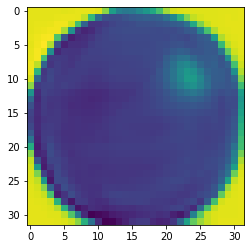

In [133]:
plt.imshow(X_new[:,29341].reshape(32,32))

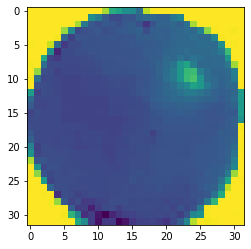

In [134]:
plt.imshow(x_valid_flat[:,1].reshape(32,32))

In [87]:
x_train_flat.shape, x_valid_flat.shape, x_test_flat.shape

((1024, 29340), (1024, 7853), (1024, 1964))

In [89]:
X_new.shape, x_all.shape

((1024, 39157), (1024, 39157))

In [91]:
ind1 = x_train_flat.shape[1]
ind2 = ind1 + x_valid_flat.shape[1]
ind3 = ind2 + x_test_flat.shape[1]

x_train_PCA, x_valid_PCA, x_test_PCA = X_new[:,0:ind1], X_new[:,ind1:ind2],X_new[:,ind2:ind3]

In [94]:
x_train_PCA.shape, x_valid_PCA.shape,x_test_PCA.shape

((1024, 29340), (1024, 7853), (1024, 1964))

In [101]:
y_valid = y_vaild

In [103]:
len(y_train), len(y_valid), len(y_test)

(29340, 7853, 1964)

In [132]:
y_valid[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Train feed-forward NN with reduced images

In [148]:
x_train_PCA = x_train_PCA.transpose()
x_valid_PCA = x_valid_PCA.transpose()
x_test_PCA = x_test_PCA.transpose()

In [185]:
def FW_iter(lis_PCA):
    lis_FW = []
    for itr in range(len(lis_PCA)):
        x_train_PCA, x_valid_PCA, x_test_PCA = lis_PCA[itr]
        x_train_PCA = x_train_PCA.transpose()
        x_valid_PCA = x_valid_PCA.transpose()
        x_test_PCA = x_test_PCA.transpose()
        epochs = 10
        batch_size = 100

        #feed forward neural network
        model = tf.keras.Sequential([
          tf.keras.layers.Input(shape = (1024)),
          tf.keras.layers.Dense(32, activation = "relu"),
          tf.keras.layers.Dense(10, activation='softmax')
          ])
        model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])
        #model.summary()

        history = model.fit(x_train_PCA, y_train,
                        batch_size = 32,
                        epochs = epochs,
                        validation_data=(x_valid_PCA, y_valid),
                        verbose = 2
                      )
        tupla = (history, model)
        lis_FW.append(tupla)
    return lis_FW

In [188]:
res = FW_iter(lis_PCA)


Train on 29340 samples, validate on 7853 samples
Epoch 1/10
29340/29340 - 3s - loss: 1.2724 - accuracy: 0.5500 - val_loss: 1.2687 - val_accuracy: 0.5878
Epoch 2/10
29340/29340 - 2s - loss: 0.8362 - accuracy: 0.7138 - val_loss: 1.2783 - val_accuracy: 0.6013
Epoch 3/10
29340/29340 - 2s - loss: 0.7577 - accuracy: 0.7419 - val_loss: 1.2373 - val_accuracy: 0.6238
Epoch 4/10
29340/29340 - 2s - loss: 0.7233 - accuracy: 0.7545 - val_loss: 1.2428 - val_accuracy: 0.6069
Epoch 5/10
29340/29340 - 2s - loss: 0.6946 - accuracy: 0.7639 - val_loss: 1.3409 - val_accuracy: 0.5947
Epoch 6/10
29340/29340 - 2s - loss: 0.6800 - accuracy: 0.7668 - val_loss: 1.2706 - val_accuracy: 0.6165
Epoch 7/10
29340/29340 - 2s - loss: 0.6697 - accuracy: 0.7707 - val_loss: 1.3206 - val_accuracy: 0.6088
Epoch 8/10
29340/29340 - 2s - loss: 0.6600 - accuracy: 0.7722 - val_loss: 1.2794 - val_accuracy: 0.6153
Epoch 9/10
29340/29340 - 2s - loss: 0.6486 - accuracy: 0.7762 - val_loss: 1.3167 - val_accuracy: 0.6147
Epoch 10/10
293

In [201]:
res[1]

(<tensorflow.python.keras.callbacks.History at 0x1520edc1dc8>,
 <tensorflow.python.keras.engine.sequential.Sequential at 0x1521aa7b0c8>)

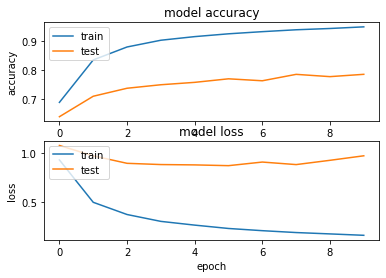

In [209]:
#plotting images
import matplotlib.pyplot as plt 
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss']) 
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

Text(0.5, 1.0, 'Axis [1,1]')

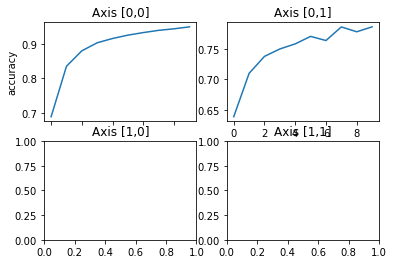

In [223]:
fig, axs = plt.subplots(2, 2)

#plt.plot()  
#plt.plot(history.history['val_accuracy'])

axs[0,0].set_title('Training models accuracy')  
axs[0,0].set(ylabel = 'accuracy', xlabel= 'epoch') 
axs[0,0].label_outer()

#plt.legend(['train', 'test'], loc='upper left') # sarebbe 10,20,30..

axs[0,1].set_title('Validation model accuracy')
#axs[0,1].ylabel('accuracy')  
#axs[0,1].xlabel('epoch') 

axs[1,0].set_title('Training model loss')
#axs[1,0].ylabel('loss')  
#axs[1,0].xlabel('epoch') 

axs[1,1].set_title('Validation model loss')
#axs[1,1].ylabel('loss')  
#axs[1,1].xlabel('epoch') 

axs[0, 0].plot(history.history['accuracy'])
axs[0,1].plot(history.history['val_accuracy']) 
axs[0, 0].set_title('Axis [0,0]')
#axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
#axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
#axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')


In [224]:
import numpy as np
import pandas as pd
from plotnine import *



ModuleNotFoundError: No module named 'plotnine'

In [380]:

df = pd.DataFrame(
columns = ['epochs', 'valid', 'components', 'accuracy', 'value']
)

for itr in range(len(res)):
  
    time =  [i for i in range(1,epochs+1)]
    valids =  [0 for i in range(1,epochs+1)]
    components = [(itr+1)*10 for i in range(1,epochs+1)]
    accur = [1 for i in range(1,epochs+1)]
    acc = res[itr][0].history['accuracy']
    
    df1=  pd.DataFrame(data= np.vstack((time,valids,components,accur,acc)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    loss= res[itr][0].history['loss']
    accur = [0 for i in range(1,epochs+1)]
    df2=  pd.DataFrame(data= np.vstack((time,valids,components,accur,loss)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    valids =  [1 for i in range(1,epochs+1)]
    accur = [1 for i in range(1,epochs+1)]
    val_acc = res[itr][0].history['val_accuracy']
    
    df3=  pd.DataFrame(data= np.vstack((time,valids,components,accur,val_acc)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    accur = [0 for i in range(1,epochs+1)]

    val_loss = res[itr][0].history['val_loss']
    df4=  pd.DataFrame(data= np.vstack((time,valids,components,accur,val_loss)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])
   
    df = df.append(df1.append(df2).append(df3).append(df4))
    #df.append(df2)
    #df.append(df3)
    #df.append(df4)



In [342]:
from plotnine import *

In [388]:
df['components'] = df['components'].astype('category')

In [384]:
df = df.assign(accuracy = ['accuracy' if accuracy == 1. else 'loss' for accuracy in df['accuracy']])

In [386]:
df = df.assign(valid = ['validation' if valid == 1. else 'training' for valid in df['valid']])

In [385]:
df['accuracy'].unique()

array(['accuracy', 'loss'], dtype=object)

C:\Users\gregs\Anaconda3\envs\tensorflow\lib\site-packages\plotnine\facets\facet.py:552: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
C:\Users\gregs\Anaconda3\envs\tensorflow\lib\site-packages\plotnine\facets\facet.py:558: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


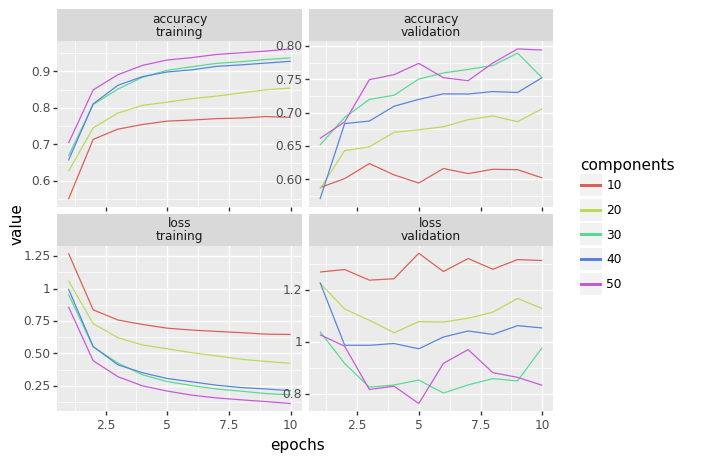

<ggplot: (-9223371946048115288)>

In [390]:
ggplot(df, aes(x='epochs', y='value',color='components')) + \
    geom_line() + \
    facet_wrap(['accuracy','valid'],scales='free')

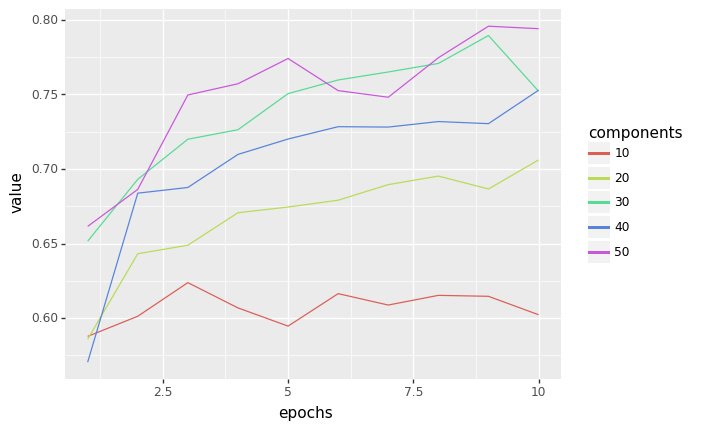

<ggplot: (-9223371946094510764)>

In [329]:
l = df[df['accuracy']==1 ]
l2 = l[l['valid']==1]
ggplot(l2, aes(x='epochs', y='value',color='components')) + \
    geom_line()

In [249]:
a = np.zeros(3)
b = np.ones(3)
np.vstack((a,b)).T
np.array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

In [254]:
 pd.DataFrame(data = np.vstack((a,b)).T, columns=['ciao','bello'])

,ciao,bello
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [242]:
res[1][0].history['accuracy']

[0.6263463,
 0.74509203,
 0.7858555,
 0.80698705,
 0.81584865,
 0.82552826,
 0.83251536,
 0.84113836,
 0.84969324,
 0.8545331]

,epochs,valid,components,accuracy


In [233]:
res[1][0].history.epochs

AttributeError: 'dict' object has no attribute 'epochs'

In [232]:
epochs

10

In [ ]:
## epochs = 10
batch_size = 100

#feed forward neural network
model = tf.keras.Sequential([
      tf.keras.layers.Input(shape = (1024)),
      tf.keras.layers.Dense(32, activation = "relu"),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

In [150]:
model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [151]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                32800     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 33,130
Trainable params: 33,130
Non-trainable params: 0
_________________________________________________________________


In [152]:
history = model.fit(x_train_PCA, y_train,
                    batch_size = 32,
                    epochs = epochs,
                    validation_data=(x_valid_PCA, y_valid),
                    verbose = 2
                  )

Train on 29340 samples, validate on 7853 samples
Epoch 1/10
29340/29340 - 4s - loss: 0.9312 - accuracy: 0.6888 - val_loss: 1.0804 - val_accuracy: 0.6392
Epoch 2/10
29340/29340 - 2s - loss: 0.4943 - accuracy: 0.8353 - val_loss: 0.9732 - val_accuracy: 0.7099
Epoch 3/10
29340/29340 - 3s - loss: 0.3683 - accuracy: 0.8801 - val_loss: 0.8962 - val_accuracy: 0.7376
Epoch 4/10
29340/29340 - 3s - loss: 0.2975 - accuracy: 0.9034 - val_loss: 0.8834 - val_accuracy: 0.7496
Epoch 5/10
29340/29340 - 3s - loss: 0.2590 - accuracy: 0.9159 - val_loss: 0.8799 - val_accuracy: 0.7579
Epoch 6/10
29340/29340 - 2s - loss: 0.2244 - accuracy: 0.9256 - val_loss: 0.8721 - val_accuracy: 0.7702
Epoch 7/10
29340/29340 - 3s - loss: 0.2017 - accuracy: 0.9331 - val_loss: 0.9092 - val_accuracy: 0.7634
Epoch 8/10
29340/29340 - 3s - loss: 0.1824 - accuracy: 0.9396 - val_loss: 0.8831 - val_accuracy: 0.7856
Epoch 9/10
29340/29340 - 3s - loss: 0.1683 - accuracy: 0.9440 - val_loss: 0.9272 - val_accuracy: 0.7777
Epoch 10/10
293

In [153]:
y_pred = model.predict(x_test_PCA)

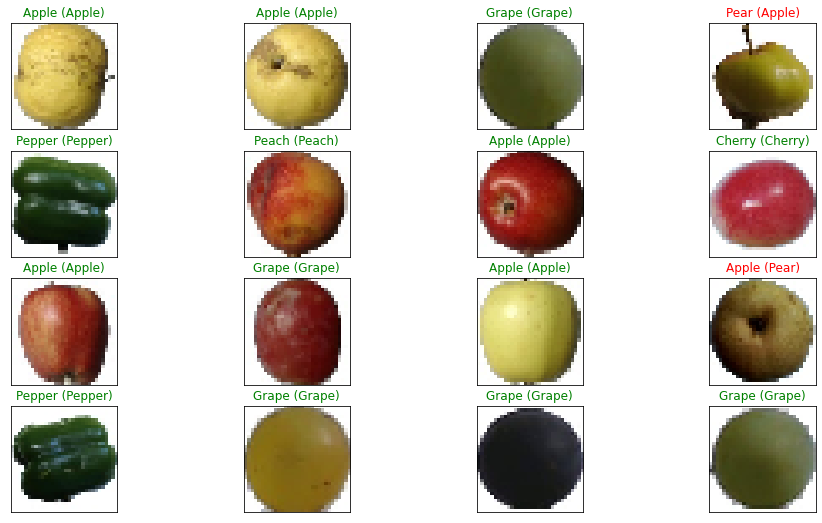

In [154]:
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test_PCA.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

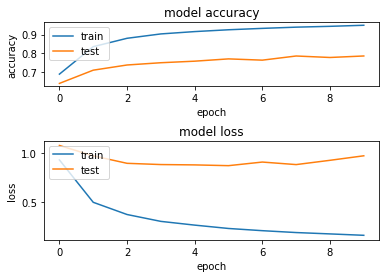

In [208]:
#plotting images
import matplotlib.pyplot as plt 
plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(311)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss']) 
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

   
plt.show()